In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option("max_columns",200)


In [42]:
df = pd.read_csv("C:/Users/User/Downloads/Documents/Largest WWTP/clean_largewwtp.csv")

In [4]:
df['City_Country'] = df['City'] + ', ' + df['Country']
df2 = df.drop(columns=['City','Country','Plant_Name','Opening_Year','Latitude',\
                       'Longitude','Area(sqkm)'])

#Grouping into Top 10
df_groups = df2.groupby('City_Country')['WetWeather(CMD)'].sum()
top_10 = df_groups.nlargest(10)


df_filtered = df2[df2['City_Country'].isin(top_10.index)]


In [43]:
df_melted = df_filtered.melt(id_vars='City_Country', var_name='Weather', value_name='Value')
df_melted

,City_Country,Weather,Value
0,"Montreal, Canada",DryWeather(CMD),2780000
1,"Detroit, USA",DryWeather(CMD),2460000
2,"Chicago, USA",DryWeather(CMD),2665000
3,"Washington D.C., USA",DryWeather(CMD),1450000
4,"Boston, USA",DryWeather(CMD),1438000
5,"Mexico City, Mexico",DryWeather(CMD),2000000
6,"Los Angeles, USA",DryWeather(CMD),1041000
7,"Paris, France",DryWeather(CMD),1460000
8,"Hong Kong, China",DryWeather(CMD),0
9,"Cairo, Egypt",DryWeather(CMD),1700000


Text(0.0, 1.0, 'Source: Wikipedia')

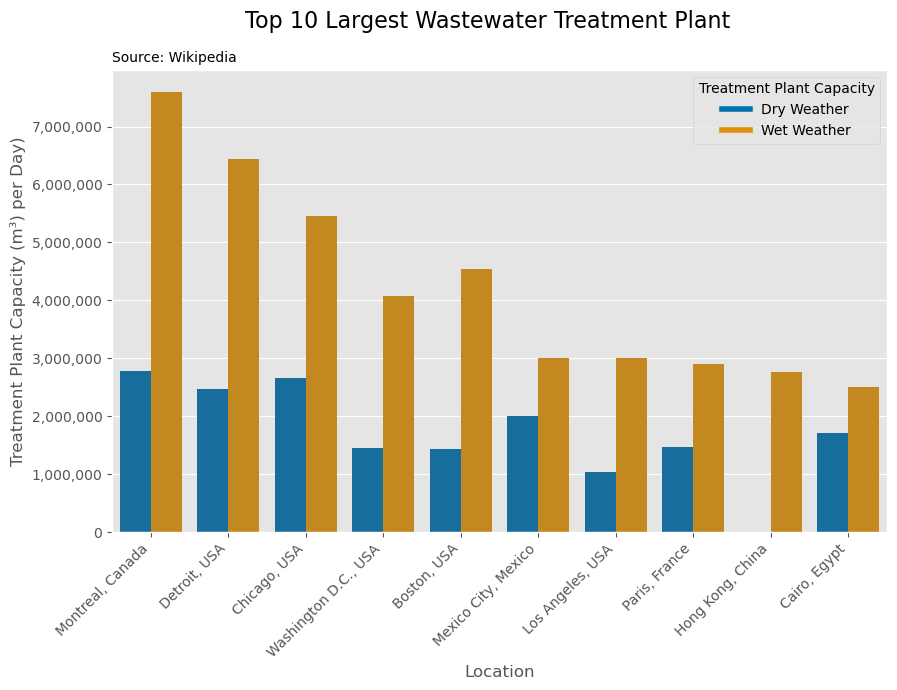

In [44]:
#Bar Chart
plt.figure(figsize=(10, 6)) 
bar_width = 0.35 
ax = sns.barplot(x='City_Country', y='Value', hue='Weather', data=df_melted, palette='colorblind')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Plant Capacity (m\N{SUPERSCRIPT THREE} per Day)', \
         labels=['Dry Weather', 'Wet Weather'], loc='upper right')
ax.set_xlabel('Location')
ax.set_ylabel('Treatment Plant Capacity (m\N{SUPERSCRIPT THREE}) per Day)')

ax.get_legend().set_title('Treatment Plant Capacity (m\N{SUPERSCRIPT THREE}) per Day)')
new_labels = ['Dry Weather','Wet Weather']
legend_handles = [plt.Line2D([0], [0], color=sns.color_palette('colorblind')[i], lw=4) for i in range(2)]
legend = plt.legend(legend_handles, new_labels, title='Treatment Plant Capacity', loc='upper right')

plt.suptitle('Top 10 Largest Wastewater Treatment Plant', fontsize=16)
plt.title('Source: Wikipedia', fontsize=10, loc='left')


In [45]:
df_corr = df[['Opening_Year','DryWeather(CMD)',\
 'WetWeather(CMD)','Area(sqkm)']].dropna().corr()

df_corr

,Opening_Year,DryWeather(CMD),WetWeather(CMD),Area(sqkm)
Opening_Year,1.000000,-0.064122,-0.050570,0.003962
DryWeather(CMD),-0.064122,1.000000,0.370275,-0.211191
WetWeather(CMD),-0.050570,0.370275,1.000000,-0.202192
Area(sqkm),0.003962,-0.211191,-0.202192,1.000000


In [46]:
plt.figure(figsize=(8, 6))  
sns.heatmap(df_corr , annot=True, cmap='coolwarm', vmin=-1, vmax=1)

TypeError: 'DataFrame' object is not callable

<Figure size 800x600 with 0 Axes>